In [ ]:
!pip install deepface
!pip install retina-face

In [6]:
from deepface import DeepFace
import pandas as pd

models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

img_path = "./img/unknown/all.jpg"
df = DeepFace.find(img_path = img_path, db_path = "./datasets", model_name = models[1], distance_metric = metrics[2], detector_backend = backends[4])

23-12-20 00:23:07 - ⚠️ Representations for images in ./datasets_copy folder were previously stored in representations_facenet.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
23-12-20 00:23:07 - There are 13 representations found in representations_facenet.pkl
23-12-20 00:23:09 - find function lasts 2.1583151817321777 seconds


Yujin
Wonyoung
4 unkwon person


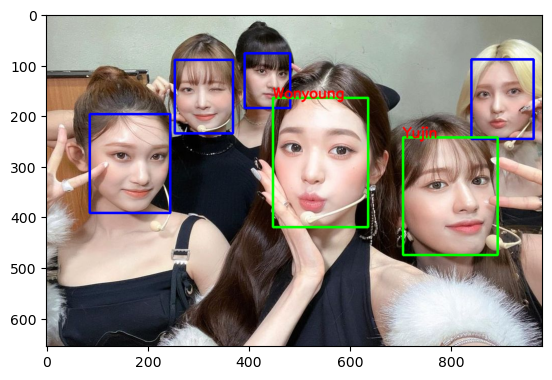

In [7]:
import cv2
from matplotlib import pyplot as plt
from retinaface import RetinaFace

resp = RetinaFace.detect_faces(img_path)

img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
for people in resp:
  cv2.rectangle(img_rgb, (resp[people]['facial_area'][0],resp[people]['facial_area'][1]), (resp[people]['facial_area'][2], resp[people]['facial_area'][3]), (0,0,255), 3)

unknow = 0
for idx, data in enumerate(df):
   
    last = len(data)-1
    if last < 0: 
        unknow += 1
        continue

    
    ori_point = (data.loc[last, 'source_x'], data.loc[last, 'source_y'])
    name = str(data.loc[last, 'identity']).split('\\')[1].split('/')[0]
    print(name)
    cv2.rectangle(img_rgb, ori_point, (ori_point[0]+data.loc[last,'source_w'], ori_point[1]+data.loc[last, 'source_h']), (0,255,0), 3)
    cv2.putText(img_rgb, name, ori_point, fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = img_rgb.shape[0]*img_rgb.shape[1]/700000, color = (255, 0, 0), thickness = 2, lineType=cv2.LINE_AA) 

print(f"{unknow} unkwon person")
plt.imshow(img_rgb)
plt.show()